### ***Phoenix Crime Data - A Sneak Peek with Visuals***

---



**INTRODUCTION**

This dataset provides detailed records of crimes in Phoenix from 2021 to 2023, including types like motor vehicle theft, larceny, and rape. It contains key information such as incident numbers, dates, crime categories, and location details like ZIP codes and premises. This data enables the analysis of crime patterns by location, time, and type, which is valuable for identifying crime hotspots and guiding public safety measures across Phoenix.

**PROBLEM STATEMENT**

Analyzing Crime Patterns to Enhance Public Safety

Crime rates and patterns are a significant concern for urban communities, law enforcement agencies, and policymakers. Understanding when, where, and how crimes occur is crucial for devising effective crime prevention strategies and ensuring the safety of citizens. In this analysis, crime data from various sources between 2021 and 2023 have been compiled and visualized to identify trends in criminal activity based on time, location, and type of crime.

The primary goal is to examine:

**Temporal Crime Trends:** How do crime rates fluctuate throughout the week, specifically focusing on peak crime days and hours?

**Geospatial Crime Concentration:** Which areas exhibit higher concentrations of criminal activity, and how can this knowledge help prioritize safety efforts in those regions?

**Crime by Premises**: What types of premises are most prone to criminal activity, and what security measures can residents and business owners take to mitigate risk?

**Crime Prevention Insights:** Based on the patterns observed, what actionable recommendations can be implemented by individuals and communities to reduce the likelihood of crime victimization?

By addressing these questions, the analysis aims to assist city officials, law enforcement, and the general public in understanding crime patterns and making informed decisions to improve safety measures across vulnerable areas and times.

**PSEUDOCODE**


1. Load the dataset and convert the 'OCCURRED ON' column to a datetime format.

2. **Frequency of crimes by ZIP code:**

    a. For each unique ZIP code:
        - Count the number of crimes associated with that ZIP code.

    b. Store the ZIP code and crime count in a new table.

    c. Output the ZIP codes and their corresponding crime counts.

3. **Indoor vs. Outdoor crime vulnerability:**

    a. Define indoor and outdoor spaces based on the 'PREMISE TYPE' column.
        - If the premise type contains 'STREET', 'SIDEWALK', 'ROADWAY', 'PARKING LOT', or 'HIGHWAY', categorize it as 'Outdoor'.
        - Otherwise, categorize it as 'Indoor'.

    b. For each location type ('Indoor' or 'Outdoor'):
        - Count the number of crimes.

    c. Output the total number of crimes for both 'Indoor' and 'Outdoor' locations.

4. **Crime frequency by day of the week:**

    a. Extract the day of the week from the 'OCCURRED ON' column.

    b. For each day of the week:
        - Count the number of crimes.

    c. Store the day and crime count in a new table.

    d. Output the days of the week and their corresponding crime counts.

5. **Crime frequency by hour on Friday and Saturday:**

    a. Extract the hour from the 'OCCURRED ON' column.

    b. Filter the dataset for records where the day of the week is 'Friday' or 'Saturday'.

    c. For each hour on Friday and Saturday:
        - Count the number of crimes.

    d. Store the day, hour, and crime count in a new table.

    e. Output the hours and crime counts for Friday and Saturday.

6. **Average percentage of crime categories across June, July, and August:**

    a. Extract the month from the 'OCCURRED ON' column.

    b. Filter the dataset for records where the month is June (6), July (7), or August (8).

    c. For each 'UCR CRIME CATEGORY':
        - Count the number of crimes in June, July, and August.
        - Calculate the percentage of each crime category for these months by dividing the count of each category by the total number of crimes in the summer months.
        - Compute the average percentage of each crime category across these three months.

    d. Store the crime category, month, and percentage in a new table.

    e. Output the average percentage of various crime categories for June, July, and August.
    
7. End of the process.


In [1]:
# Cleaned Data

import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/crime_data.csv'
df = pd.read_csv(file_path)

# Convert the 'OCCURRED ON' and 'OCCURRED TO' columns to datetime format and replace blanks with NaN
df['OCCURRED ON'] = pd.to_datetime(df['OCCURRED ON'], errors='coerce')
df['OCCURRED TO'] = pd.to_datetime(df['OCCURRED TO'], errors='coerce')

# Drop rows where both 'OCCURRED ON' and 'OCCURRED TO' are NaN
df = df.dropna(subset=['OCCURRED ON'])
df = df.dropna(subset=['OCCURRED TO'])

# Filter the dataframe for the years 2021, 2022, and 2023
filtered_df = df[df['OCCURRED ON'].dt.year.isin([2021, 2022, 2023])]

# Display the first few rows of the filtered dataframe
print(filtered_df.head())

# Optionally, save the filtered data to a new CSV file
filtered_df.to_csv('/content/Team_15_filtered_crime_data_2021_2023.csv', index=False)

<ipython-input-1-6cdb0024da95>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


             INC NUMBER OCCURRED ON         OCCURRED TO  UCR CRIME CATEGORY  \
338490     202180000052  2021-01-01 2021-01-02 04:00:00       LARCENY-THEFT   
338491  202100000188143  2021-01-01 2021-02-04 10:44:00  AGGRAVATED ASSAULT   
338492  202100000106198  2021-01-01 2021-01-07 23:59:00            BURGLARY   
338493  202100000012476  2021-01-01 2021-01-03 11:00:00            BURGLARY   
338495  202100000181830  2021-01-01 2021-02-02 11:05:00       LARCENY-THEFT   

                100 BLOCK ADDR      ZIP                 PREMISE TYPE  GRID  
338490     10XX E JEFFERSON ST  85034.0  STREET / ROADWAY / SIDEWALK  BA29  
338491          82XX S 33RD DR  85339.0          SINGLE FAMILY HOUSE  IB21  
338492  59XX W MEADOWBROOK AVE  85033.0          SINGLE FAMILY HOUSE  BI14  
338493  3XX W INDIAN SCHOOL RD  85013.0  STOREROOM/SHED (COMMERCIAL)  BG27  
338495          33XX N 24TH PL  85016.0  STREET / ROADWAY / SIDEWALK  BF33  


**Interpretation**

The code cleans and filters a dataset by converting date columns to a proper datetime format, removing rows with missing dates, and filtering the data for the years 2021 to 2023.

After filtering, the dataset is saved into a new CSV file for further analysis.

This prepares the dataset by ensuring it contains valid, complete date information and is limited to a specific timeframe (2021–2023), which is often needed for further analysis.

<ipython-input-2-aed0b0888b4b>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(file_path)


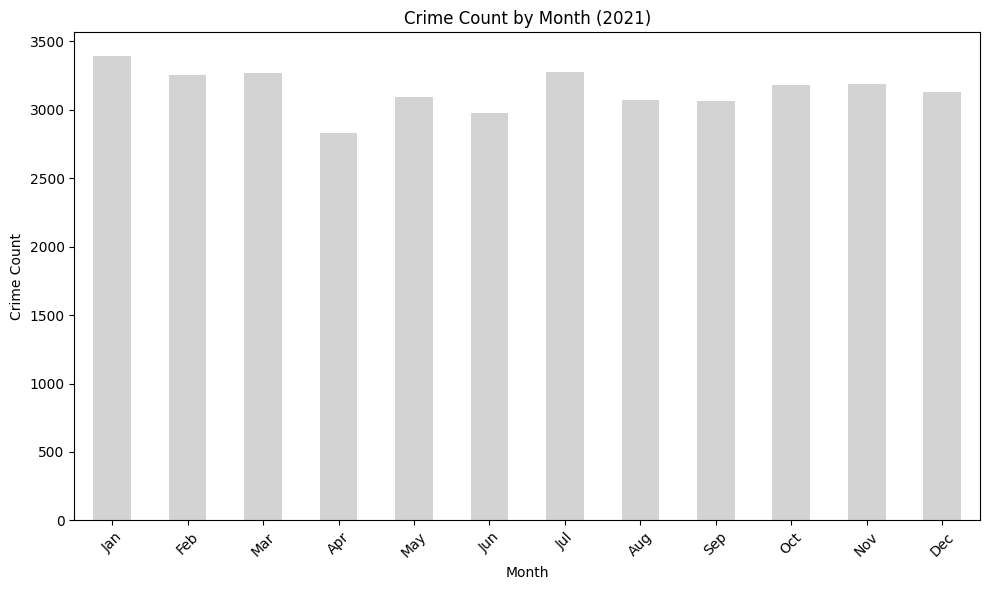

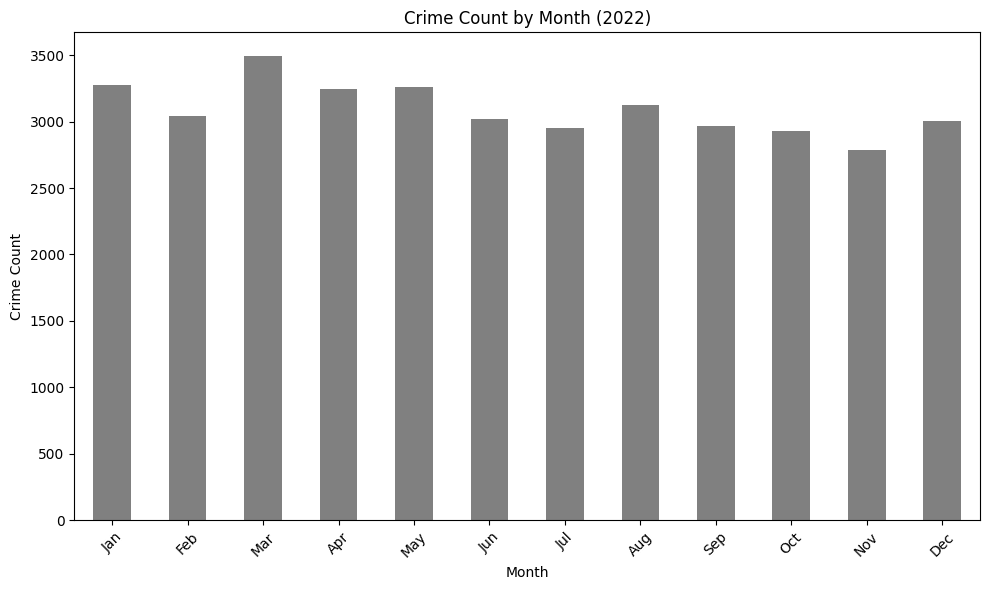

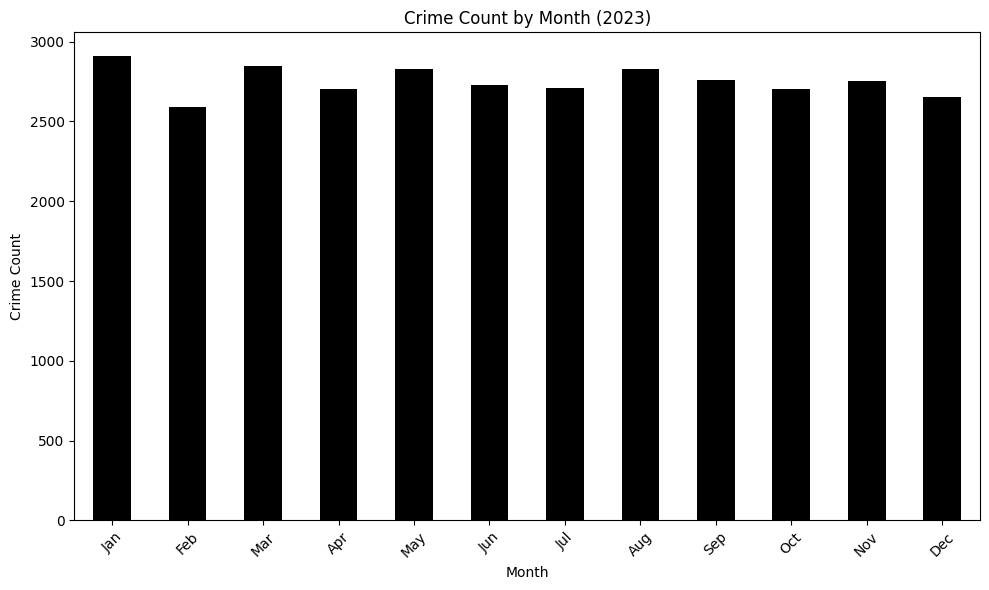

In [2]:
# Crime analysis of all the months from 2021 - 2023 (most recent years)

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Team_15_filtered_crime_data_2021_2023.csv'
crime_data = pd.read_csv(file_path)

# Convert "OCCURRED ON" column to datetime
crime_data['OCCURRED ON'] = pd.to_datetime(crime_data['OCCURRED ON'], errors='coerce')

# Extract the year and month from the datetime column
crime_data['Year'] = crime_data['OCCURRED ON'].dt.year
crime_data['Month'] = crime_data['OCCURRED ON'].dt.month

# ---- Plot for 2021 ----
# Filter the data for the year 2021
crime_data_2021 = crime_data[crime_data['Year'] == 2021]

# Group the data by month and calculate the total crime count for each month in 2021
monthly_crime_counts_2021 = crime_data_2021.groupby('Month').size()

# Plot the bar chart for 2021
plt.figure(figsize=(10, 6))
monthly_crime_counts_2021.plot(kind='bar', color='lightgrey')  # Light grey shade for 2021
plt.title('Crime Count by Month (2021)')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

# ---- Plot for 2022 ----
# Filter the data for the year 2022
crime_data_2022 = crime_data[crime_data['Year'] == 2022]

# Group the data by month and calculate the total crime count for each month in 2022
monthly_crime_counts_2022 = crime_data_2022.groupby('Month').size()

# Plot the bar chart for 2022
plt.figure(figsize=(10, 6))
monthly_crime_counts_2022.plot(kind='bar', color='grey')  # Medium grey shade for 2022
plt.title('Crime Count by Month (2022)')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

# ---- Plot for 2023 ----
# Filter the data for the year 2023
crime_data_2023 = crime_data[crime_data['Year'] == 2023]

# Group the data by month and calculate the total crime count for each month in 2023
monthly_crime_counts_2023 = crime_data_2023.groupby('Month').size()

# Plot the bar chart for 2023
plt.figure(figsize=(10, 6))
monthly_crime_counts_2023.plot(kind='bar', color='black')  # Black shade for 2023
plt.title('Crime Count by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()


**Interpretation**

The reason behind choosing June, July, and August based on the crime data trends observed from bar graph of 2021, 2022, and 2023 is:

**1.Consistent Summer Crime Peaks:**

Across all three years, crime rates consistently spike during June, July, and August, making these months the most active in terms of criminal activity.

**2.Seasonal Influence:**

These months coincide with the summer season, during which factors such as extreme heat, increased social activities, and tourism contribute to higher crime rates.

**3.Trends Observed in Historical Data:**

Historical crime data shows that June, July, and August consistently have higher crime counts compared to other months. Taking the average over the three years emphasizes these months as periods of concern.

**4.Crime Category Patterns:**

Analysis of crime categories reveals that specific types of crimes, such as larceny-theft, motor vehicle theft, and assault, occur more frequently during these months, further justifying the focus.

**Conclusion**

Based on the crime trends observed over the three years, June, July, and August are consistently the most active months for crime. These months should be prioritized in analysis and prevention efforts to reduce overall crime rates during this time period. Further we have analysed seasonal crime in next cell.



<ipython-input-3-6cb9fa4e1d35>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(file_path)


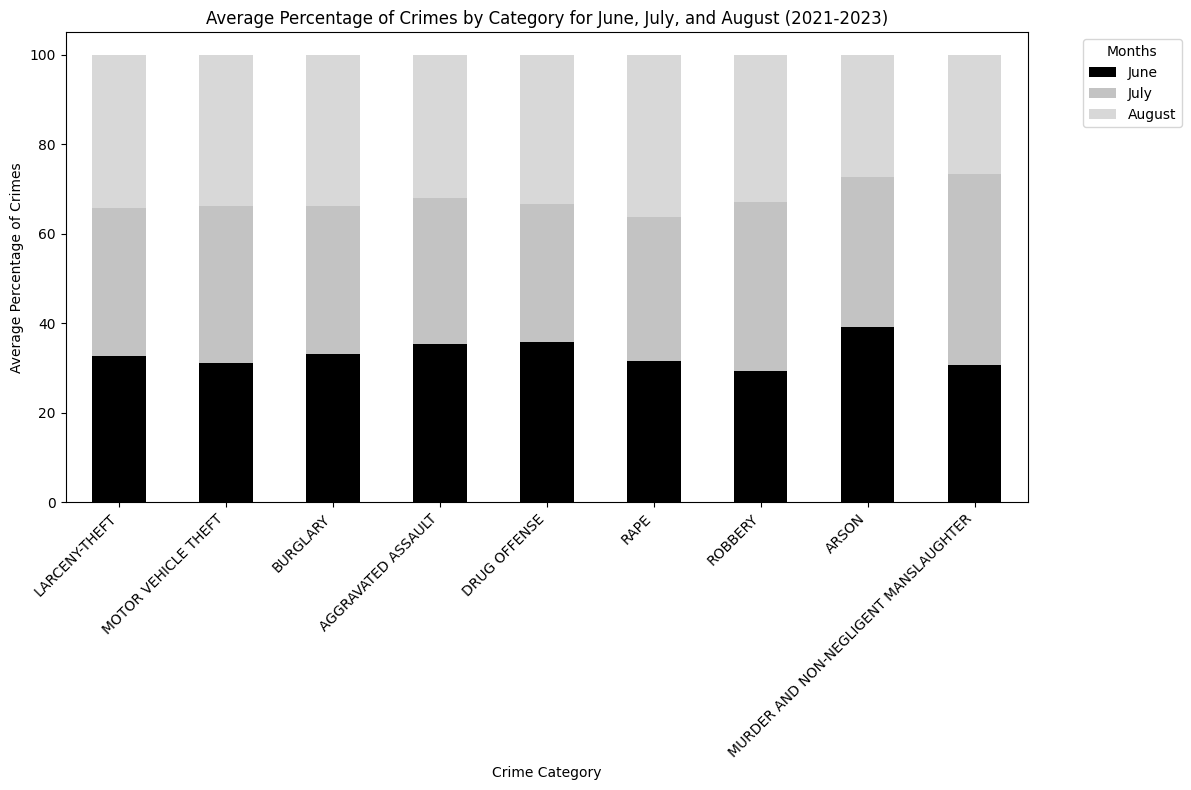

In [3]:
# 1. Seasonal crime by Karthik Salera

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Team_15_filtered_crime_data_2021_2023.csv'
crime_data = pd.read_csv(file_path)

# Convert "OCCURRED ON" column to datetime
crime_data['OCCURRED ON'] = pd.to_datetime(crime_data['OCCURRED ON'], errors='coerce')

# Filter data for the months June, July, and August across the years 2021-2023
crime_data['Month'] = crime_data['OCCURRED ON'].dt.month
crime_data['Year'] = crime_data['OCCURRED ON'].dt.year
crime_filtered = crime_data[crime_data['Month'].isin([6, 7, 8])]

# Group by Crime Category and Month (averaging across the years)
crime_grouped_avg = crime_filtered.groupby(['UCR CRIME CATEGORY', 'Month']).size().unstack(fill_value=0)

# Average over the three years
crime_avg = crime_grouped_avg.groupby(level=0).mean()

# Calculate total crimes per category across June, July, and August
crime_avg['Total Crimes'] = crime_avg.sum(axis=1)

# Sort the categories by total crimes in descending order
crime_avg_sorted = crime_avg.sort_values('Total Crimes', ascending=False)

# Drop the "Total Crimes" column since it's only used for sorting
crime_avg_sorted = crime_avg_sorted.drop(columns=['Total Crimes'])

# Calculate percentage by month for the sorted data
crime_percentage_avg_sorted = crime_avg_sorted.div(crime_avg_sorted.sum(axis=1), axis=0) * 100

# Reset index for plotting
crime_percentage_avg_sorted = crime_percentage_avg_sorted.reset_index()

# Create a dictionary to map month numbers to month names
month_map = {6: 'June', 7: 'July', 8: 'August'}
crime_percentage_avg_sorted.rename(columns=month_map, inplace=True)

# Create a gradient of blue colors for the bars (light to dark)
colors = ['#000000', '#c3c3c3', '#d8d8d8']

# Plot a stacked bar chart for the averaged and sorted data
fig, ax = plt.subplots(figsize=(12, 8))
crime_percentage_avg_sorted.set_index('UCR CRIME CATEGORY')[['June', 'July', 'August']].plot(
    kind='bar', stacked=True, ax=ax, color=colors)

# Set plot labels and title
ax.set_xlabel('Crime Category')
ax.set_ylabel('Average Percentage of Crimes')
ax.set_title('Average Percentage of Crimes by Category for June, July, and August (2021-2023)')

# Rotate x-axis labels slightly for better readability
plt.xticks(rotation=45, ha="right")

# Adjust legend position to prevent overlap
plt.legend(title='Months', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Show the updated plot
plt.show()


**Q1. How does the average percentage of various crime categories vary across the months of June, July, and August over the years 2021-2023?**

**General Overview:**
The stacked bar chart visualizes the average percentage of different crime categories across June, July, and August over a three-year span (2021-2023). Each bar is divided into three parts, representing the average crime percentages for these months. The colors (black, gray, and light gray) denote the months: June, July, and August.

**Key Insights by Crime Category:**
Larceny/Theft:

Consistently high across all three months.
There seems to be no significant change in crime percentage across the months, indicating a stable level of larceny throughout the summer period.
Motor Vehicle Theft:

Slightly higher in August, based on the light gray portion.
There's a gradual increase from June to August, suggesting that vehicle thefts might be more common later in the summer.
Burglary:

Percentages are fairly equal across the months, showing no clear monthly trend.
This suggests that burglaries are evenly distributed during the summer.
Aggravated Assault:

Like larceny and burglary, aggravated assault appears relatively consistent across the months.
It implies that these crimes do not show a strong seasonal variation in this time period.
Drug Offense:

The July percentage (gray) seems slightly higher than June and August.
July may experience a small spike in drug-related offenses, but overall, the difference is minimal.
Rape:

The percentages remain fairly stable across all three months.
No month stands out as having a significantly higher or lower occurrence of this crime.
Robbery:

August shows a slight increase in percentage, while June is the lowest.
This may suggest that robberies tend to be slightly more frequent in August.
Arson:

August shows a noticeable increase, as the light gray portion is more prominent compared to the other months.
Arson crimes seem to increase towards the end of summer, which could be a seasonal trend.
Murder and Non-Negligent Manslaughter:

There’s a small increase in July, indicating that murders slightly peak in the middle of the summer.
Overall, these crimes remain low compared to other categories but still reflect some monthly variation.
Conclusion:
Consistency in Crime Categories: Several categories, such as larceny/theft, burglary, and aggravated assault, remain fairly stable across the months, suggesting that these crimes do not have strong seasonal variations in the summer.
Slight Increases in August: Some categories, including motor vehicle theft, arson, and robbery, show a slight rise in August, suggesting these crimes may be more frequent as the summer progresses.
July Peaks in Some Categories: Drug offenses and murders seem to peak slightly in July, indicating mid-summer could be a point of focus for law enforcement for these specific crime types.

The graph overall highlights which crimes are more consistently occurring and which show small peaks during the summer months. This insight could help with crime prevention strategies targeted at specific periods.

<ipython-input-4-5cba66c657ba>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Team_15_filtered_crime_data_2021_2023.csv')


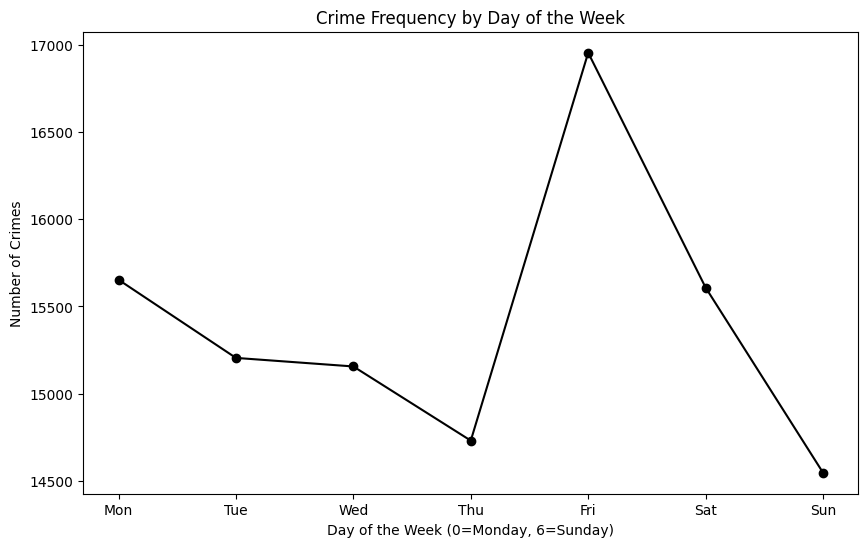

<ipython-input-4-5cba66c657ba>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friday_data['hour'] = friday_data['OCCURRED ON'].dt.hour
<ipython-input-4-5cba66c657ba>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturday_data['hour'] = saturday_data['OCCURRED ON'].dt.hour


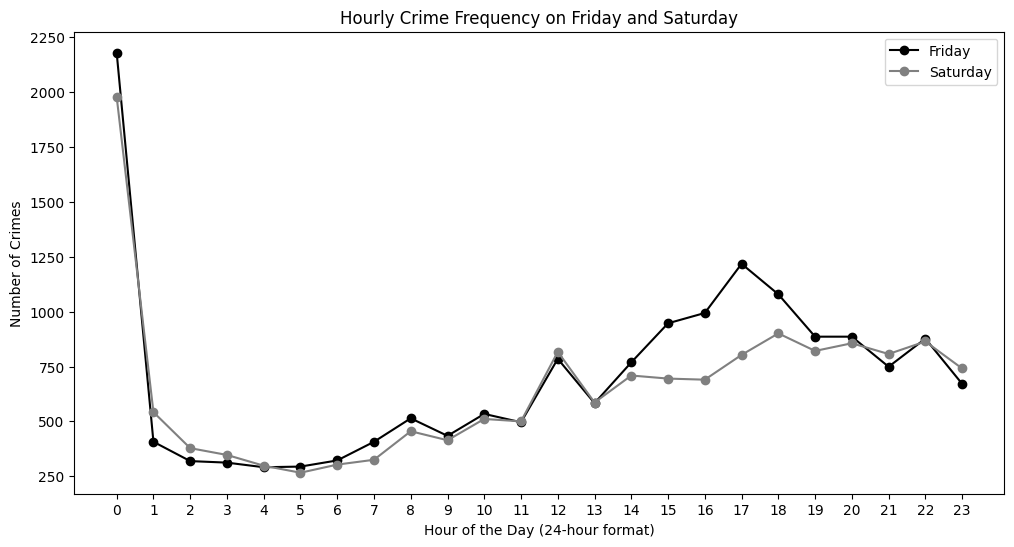

In [4]:
# 2. Crime Frequency (Day of the week and peak time) by Shobitha Bhaskar

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Team_15_filtered_crime_data_2021_2023.csv')

# Convert 'OCCURRED ON' to datetime format
data['OCCURRED ON'] = pd.to_datetime(data['OCCURRED ON'], errors='coerce')

# Extract the day of the week (0=Monday, 6=Sunday)
data['day_of_week'] = data['OCCURRED ON'].dt.dayofweek

# Group the data by 'day_of_week' and count occurrences
day_counts = data.groupby('day_of_week').size()

# Plot the occurrences by day of the week without grid
plt.figure(figsize=(10,6))
plt.plot(day_counts.index, day_counts.values, marker='o', color='black')
plt.title('Crime Frequency by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Crimes')
plt.xticks(day_counts.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Filter data for Friday (4) and Saturday (5)
friday_data = data[data['day_of_week'] == 4]
saturday_data = data[data['day_of_week'] == 5]

# Extract hour from the 'OCCURRED ON' timestamp
friday_data['hour'] = friday_data['OCCURRED ON'].dt.hour
saturday_data['hour'] = saturday_data['OCCURRED ON'].dt.hour

# Group by hour and count occurrences for both days
friday_hourly_counts = friday_data.groupby('hour').size()
saturday_hourly_counts = saturday_data.groupby('hour').size()

# Plot the hourly crime frequency for Friday and Saturday without grid
plt.figure(figsize=(12,6))

# Friday (blue)
plt.plot(friday_hourly_counts.index, friday_hourly_counts.values, marker='o', color='black', label='Friday')

# Saturday (dark blue)
plt.plot(saturday_hourly_counts.index, saturday_hourly_counts.values, marker='o', color='gray', label='Saturday')

plt.title('Hourly Crime Frequency on Friday and Saturday')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Crimes')
plt.legend()
plt.xticks(range(0, 24))
plt.show()

**Q.2. A) How does the frequency of crimes vary by day of the week?**

**Insights the graph provides:**

1.    Crime frequency is relatively stable from Monday to Thursday, with a slight item decline toward Thursday.
2.  There is a significant spike in the number of crimes on Friday, indicating Friday has the highest crime frequency of the week.
3. Crime frequency drops considerably on Saturday but remains higher than on weekdays.
4. Sunday sees the lowest crime frequency compared to other days of the week.

This graph highlights that crime tends to peak on Fridays and declines steadily over the weekend, with Sunday being the least crime-prone day.

**Q2. B) How does the frequency of crimes vary by the hour on Friday and Saturday?**

**"Insights the graph provides":**

1. The number of crimes is highest around midnight (00:00) on both days especially on Friday.
2. After midnight, the crime frequency drops sharply and remains low during the early morning hours (1:00 - 7:00 AM).
3. After midnight, the crime frequency drops sharply and remains low during the early morning hours (1:00 - 7:00 AM).
4. Crime frequency gradually increases throughout the afternoon and early evening (12:00 PM - 8:00 PM) with peaks in the late afternoon (around 5:00 - 7:00 PM) on both Friday and Saturday.
5. There are some fluctuations later in the evening (8:00 - 11:00 PM) but the crime rates on both days follow a similar pattern overall.

This graph helps understand how crime patterns change over the course of a day, highlighting that crime is more frequent at night and early morning hours, tapering off as the day progresses.

In [5]:
# 3. Geographical Analysis by Surbhee Dewan

import pandas as pd
from geopy.geocoders import Nominatim
import time

# List of zip codes
zip_codes = [
    85003, 85004, 85006, 85007, 85008, 85009, 85012, 85013, 85014, 85015, 85016,
    85017, 85018, 85019, 85020, 85021, 85022, 85023, 85024, 85027, 85028, 85029,
    85031, 85032, 85033, 85034, 85035, 85037, 85040, 85041, 85042, 85043, 85044,
    85045, 85048, 85050, 85051, 85053, 85054, 85083, 85085, 85086, 85087, 85201,
    85202, 85203, 85204, 85206, 85208, 85209, 85210, 85212, 85213, 85215, 85224,
    85225, 85226, 85233, 85234, 85239, 85242, 85248, 85249, 85250, 85251, 85253,
    85254, 85255, 85256, 85257, 85258, 85259, 85260, 85262, 85266, 85268, 85281,
    85282, 85283, 85284, 85286, 85290, 85295, 85296, 85297, 85301, 85302, 85303,
    85304, 85305, 85306, 85307, 85308, 85310, 85323, 85326, 85331, 85335, 85337,
    85338, 85339, 85340, 85345, 85351, 85353, 85355, 85361, 85363, 85374, 85381,
    85382, 85383, 85388, 85390, 85392, 85395, 85396
]

# Initialize geolocator
geolocator = Nominatim(user_agent="zip_code_locator")


# Create an empty list to store the results
location_data = []

# Loop through each zip code to get the latitude and longitude
for zip_code in zip_codes:
    try:
        location = geolocator.geocode(str(zip_code) + ',USA')
        if location:
            location_data.append({
                "Zip Code": zip_code,
                "Latitude": location.latitude,
                "Longitude": location.longitude
            })
        else:
            location_data.append({
                "Zip Code": zip_code,
                "Latitude": None,
                "Longitude": None
            })
        # Adding a delay to prevent hitting request limits
        time.sleep(1)
    except Exception as e:
        location_data.append({
            "Zip Code": zip_code,
            "Latitude": None,
            "Longitude": None
        })

# Convert the list to a DataFrame
df_locations = pd.DataFrame(location_data)

# Print the DataFrame
print(df_locations)

     Zip Code   Latitude   Longitude
0       85003  33.468323 -112.078685
1       85004  33.462137 -112.070219
2       85006  33.471442 -112.048465
3       85007  33.466035 -112.090065
4       85008  33.469108 -112.000600
..        ...        ...         ...
112     85388  33.616063 -112.437213
113     85390  33.967647 -112.763630
114     85392  33.479088 -112.309513
115     85395  33.483414 -112.394148
116     85396  33.546879 -112.591715

[117 rows x 3 columns]


In [6]:
# 3. Geographical Analysis by Surbhee Dewan


import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zipcode_data = pd.read_csv('/content/Team_15_filtered_crime_data_2021_2023.csv')

df = zipcode_data
df['count_zips'] = df['ZIP']
df['crime count'] = zipcode_data.groupby('ZIP')['count_zips'].transform(lambda x : x.duplicated(keep=False).sum())
new_df = zipcode_data.join(df_locations.set_index('Zip Code'), on='ZIP')

fig = px.scatter_mapbox(df,
                        lon = new_df['Longitude'],
                        lat = new_df['Latitude'],
                        zoom = 8.5,
                        color = new_df['crime count'],
                        size= new_df['crime count'])

fig.update_layout(mapbox_style="open-street-map")



<ipython-input-6-47387bb4391b>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  zipcode_data = pd.read_csv('/content/Team_15_filtered_crime_data_2021_2023.csv')


**Q3.How does the frequency of crimes vary for each ZIP code?**

The provided map visualization and code give insights into the spatial distribution of crime counts across various ZIP codes.

Here's an interpretation of the map:

**Key Insights:**
**Crime Density Clustering**: The size and color of the dots on the map represent crime count density within each ZIP code. Darker and larger circles indicate areas with higher crime counts, while lighter and smaller dots show areas with fewer incidents. There is a clear clustering of higher crime counts around certain urban areas like Phoenix, Glendale, and possibly Scottsdale, while outer regions have smaller and lighter circles, indicating fewer crimes.

**Geographical Spread:** The map shows that areas closer to the center of the map (like Phoenix) seem to have the highest concentration of crimes, while outlying suburbs and areas such as Buckeye, Surprise, and the wilderness areas to the north and east have significantly fewer crimes.

**Color Gradient:** The color scale on the right-hand side represents the crime counts, with a range from 0 (light) to over 4000 (dark). It indicates that the majority of higher crime concentrations occur in central urban regions.

**Visualized Longitude and Latitude:** The Longitude and Latitude columns in the dataset were used to plot these points, mapping each ZIP code based on its geographical coordinates.

This map can help identify high-crime ZIP code regions for further analysis or intervention by law enforcement, policymakers, or urban planners.

<ipython-input-7-00faf102d472>:8: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



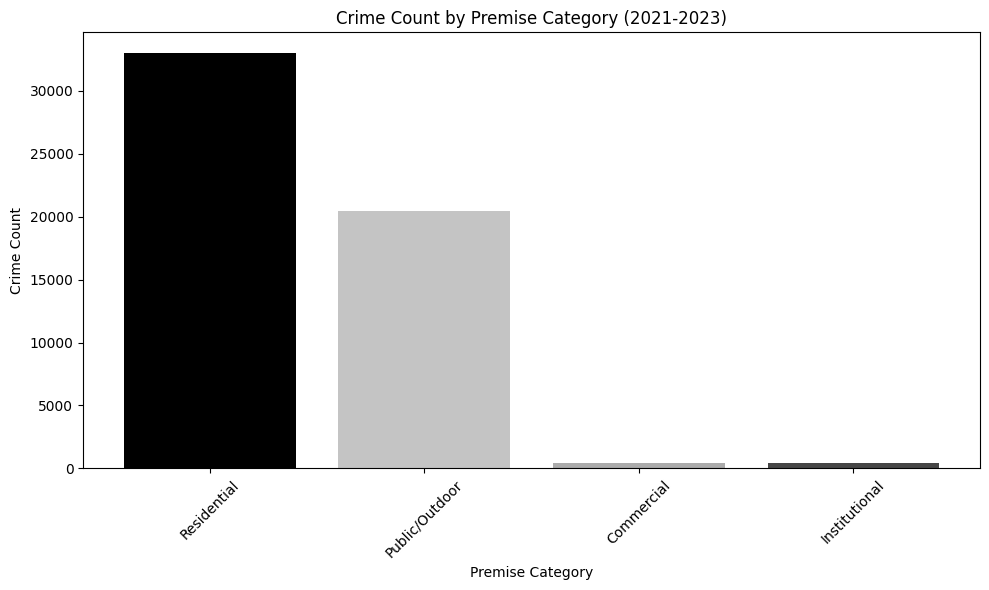

In [7]:
# 4. Premise type by Harshal Samuel

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Team_15_filtered_crime_data_2021_2023.csv'
crime_data = pd.read_csv(file_path)

# Convert the 'OCCURRED ON' column to datetime for easier manipulation
crime_data['OCCURRED ON'] = pd.to_datetime(crime_data['OCCURRED ON'], errors='coerce')

# Function to filter the dataset based on specific year and month range
def filter_crime_data_by_year_month(crime_data, start_year, end_year, start_month, end_month):
    filtered_data = crime_data[
        (crime_data['OCCURRED ON'].dt.year >= start_year) &
        (crime_data['OCCURRED ON'].dt.year <= end_year) &
        (crime_data['OCCURRED ON'].dt.month >= start_month) &
        (crime_data['OCCURRED ON'].dt.month <= end_month)
    ]
    return filtered_data

# Filtering for crimes that occurred between January 2021 and December 2023
filtered_crime_data = filter_crime_data_by_year_month(crime_data, 2021, 2023, 1, 12)

# Creating a mapping for premise types into broader categories
premise_category_map = {
    'SINGLE FAMILY HOUSE': 'Residential',
    'APARTMENT': 'Residential',
    'MOBILE HOME': 'Residential',
    'DUPLEX': 'Residential',
    'HOTEL/MOTEL': 'Residential',

    'PARKING LOT': 'Public/Outdoor',
    'STREET / ROADWAY / SIDEWALK': 'Public/Outdoor',
    'STREET / ROADWAY / ALLEY / SIDEWALK': 'Public/Outdoor',
    'PARK / PLAYGROUND': 'Public/Outdoor',
    'HIGHWAY / FREEWAY / ROAD': 'Public/Outdoor',

    'SCHOOL / COLLEGE': 'Educational',
    'COLLEGE / UNIVERSITY': 'Educational',
    'SCHOOL - ELEMENTARY / SECONDARY': 'Educational',

    'RESTAURANT / BAR': 'Commercial',
    'BAR / NIGHT CLUB': 'Commercial',
    'GAS STATION': 'Commercial',
    'BANK': 'Commercial',
    'SHOPPING MALL': 'Commercial',

    'HOSPITAL': 'Institutional',
    'CHURCH / SYNAGOGUE / TEMPLE': 'Institutional',
    'JAIL / PRISON': 'Institutional',
    'MILITARY INSTALLATION': 'Institutional',
    'NURSING HOME': 'Institutional',

    'OTHER': 'Other',
}

# Apply the mapping to create a new column with broader categories
filtered_crime_data['CATEGORY'] = filtered_crime_data['PREMISE TYPE'].map(premise_category_map).fillna('Other')

# Get a count of crimes by the new 'CATEGORY' column, but keep 'Other' for future reference
category_counts = filtered_crime_data['CATEGORY'].value_counts()

# Remove the 'Other' category from the counts for plotting purposes
category_counts_no_other = category_counts[category_counts.index != 'Other']

# Create a histogram for the counts of crimes based on the premise categories
plt.figure(figsize=(10, 6))
plt.bar(category_counts_no_other.index, category_counts_no_other.values, color=['#000000', '#c4c4c4', '#ababab', '#464646', '#8f8f8f'])
plt.title('Crime Count by Premise Category (2021-2023)')
plt.xlabel('Premise Category')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Q4. What are the most vulnerable areas to crime, in indoor or outdoor spaces? - What do you think are you safe indoors?**

The provided Python code creates a bar chart showing the count of crimes by premise category between the years 2021 and 2023. Here's an interpretation of the visual:

**Key Insights:**
**Crime Distribution by Premise Type:** The bar chart categorizes crime data based on broader premise categories: Residential, Public/Outdoor, Educational, Commercial, and Institutional. These categories were created by grouping specific premise types (e.g., houses, streets, schools, etc.) from the dataset.

**Major Crime Locations:**

Residential: This category likely dominates the crime counts in the chart due to the large number of premises like houses, apartments, and hotels. Since residential areas are common, it's expected that a significant number of crimes occur here.
Public/Outdoor: This category covers streets, roadways, parks, and similar open spaces. Given its broad definition, it may also show a high crime count, as outdoor public spaces are common areas for incidents such as theft, assault, and vandalism.
Commercial: Crimes in places like restaurants, gas stations, and shopping malls are captured here. These areas can see incidents such as robberies, burglaries, and petty theft.
Institutional and Educational: These categories might show lower crime counts compared to the others, as premises such as schools, hospitals, and military installations generally have more security measures in place. Crimes in these areas might be less frequent but could include specific offenses like trespassing or assault.
Exclusion of 'Other': The 'Other' category, which doesn't fit neatly into the main groups, has been excluded from the visual to emphasize the primary categories. However, it still represents a portion of the crime data, which might include miscellaneous locations or unspecified premises.

**Color Representation:** The chart uses varying shades of gray and black to represent each category. The visual design makes it clear which categories have higher crime counts, while still maintaining a simple and professional aesthetic.

**Time Period (2021-2023):** The filtered dataset includes crime data over a broad period, offering a historical view of where most crimes occurred across different types of premises. This can help identify trends over time in terms of crime hotspots in various categories.

**Overall:**
The visual provides a clear overview of crime distribution across different premises, with residential and public/outdoor locations likely having the highest crime counts. This analysis could help law enforcement, urban planners, and policymakers understand where to focus their crime prevention strategies.



**TEAMWORK DESCRIPTION**

Each individual divided all four questions equally i.e., each question to one team member and contributed in writing pseudocode and interpretation
1. **Karthik Salera Gowdru PrasannaKumar** - Analyzed average percentage of various crime categories vary across the months of June, July and August over the years 2021 - 2023.

2. **Surbhee Dewan** - Analysed the frequency of crimes vary for each ZIP code.

3. **Harshal Samuel Albert** - Analysed the most vulnerable areas to crime, in indoor or outdoor spaces.

4. **Shobitha Bhaskar** - Analysed the frequency of crimes vary by day of week and by hour on Friday and Saturday.

**OVERALL INTERPRETATION**

**Time of Week and Day Impacts:** The analysis suggests that certain times of the week (Fridays) and specific hours of the day (late evening) are high-crime periods. Law enforcement or community watch programs could consider ramping up patrols and security during these peak times.

**Premises and Crime:** The concentration of crimes in residential areas underscores the need for increased residential safety measures, such as neighborhood watch programs, better lighting, and surveillance systems in public areas near homes.

**Location-Based Crime Concentration:** The map showing higher crime densities in certain parts of the city suggests that particular neighborhoods may require targeted crime prevention efforts, potentially focusing on socioeconomic factors contributing to crime.

**Based on the interpretations of the visualizations, there are several actionable recommendations for individuals to reduce their chances of being victims of crime. These strategies focus on timing, location, and precautionary measures that align with the crime trends observed.**

1. Avoid High-Crime Times of the Week and Day
2. Enhance Home and Neighborhood Security
3. Stay Safe in Public or Outdoor Spaces
4. Be Cautious in High-Crime Areas
5. Avoid Parking in Isolated Areas
6. Avoidance of Alcohol-Related or Late-Night Events
7. Use Technology for Safety
8. Report Suspicious Activity

